# DS Lab Activity 1.5. Scikit-Learn Superfast Tutorial


Scikit-learn is an easy to hand library of machine learning and data science functionalities that makes manipulating models, training and fitting them super easy. It also has a hand set of functions for loading and generating synthetic data as well as splitting, evaluation metrics (accuracy, confusion matrix), cross validation and OCR etc. All of this jargons are going to be more familiar to you when we cover other topics in later units. So do not worry too much about looking them now.

The following [basic tutorial](https://scikit-learn.org/stable) you will cover the basics of using scikit-learn, several of our Jupyter notebooks in later units are going to utilise sklearn library and we will walk you through them step by step. 

# Real Datasets for classification 

In [1]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML('<style>.container {width: 85% !important}</style>'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

print(type(iris.data))

print(iris.data.shape)
print(iris.target.shape)


<class 'numpy.ndarray'>
(150, 4)
(150,)


All datasets have data and target, these are the X and Y expected by the fit function which trains a model. Let us have a look at two famous datasets, the iris and digits.

In [3]:
X = iris.data
y = iris.target

Iris is a dataset of flowers features that intend to classify a flower based on its features into one of three classes ('virginica', 'setosa', and 'versicolor'). Do not worry too much about the names of the classes, they represent a typical three shapes of flowers.

Note that in this case each row in the data object is a set of measurements that has been taken for the sample collected in the dataset by Fisher in 1930s

In [4]:
# print(iris.DESCR) # execute this line for more details about iris

The digits dataset comprises a set of digits 0,...9 each has been hand written. Each row in the data property is flattened 8x8=64 array that represents pixels intensity of an image for a specific digit. If we want the images unflattened we use .images,  see below.

In [5]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


To print one of these image we simply call imshow from plt

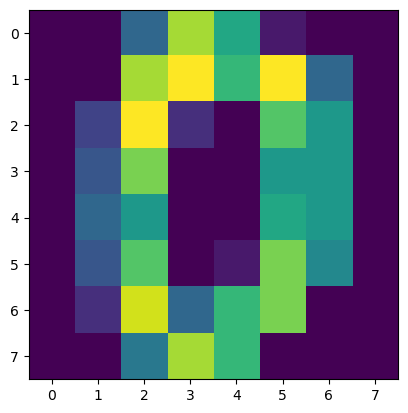

In [6]:
plt.imshow(digits.images[0,:,:])

In [7]:
#print(digits.DESCR) # execute this line for more details about digits

# Synthetic Datasets for Classification

Lots of synthetic datasets are available from sklearn and are very convenient

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
print(X.shape)

(1000, 2)


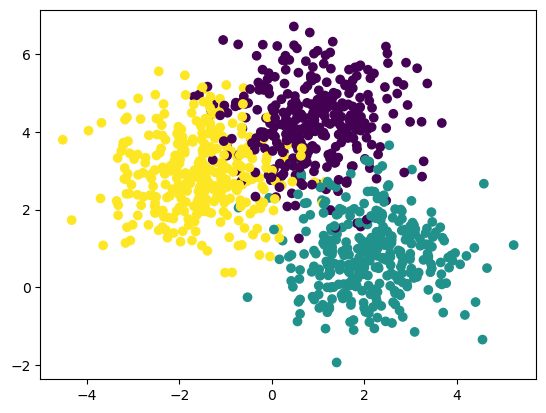

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

check [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator) for extensive list of synthetic dataset that can be easily generated by sklearn.

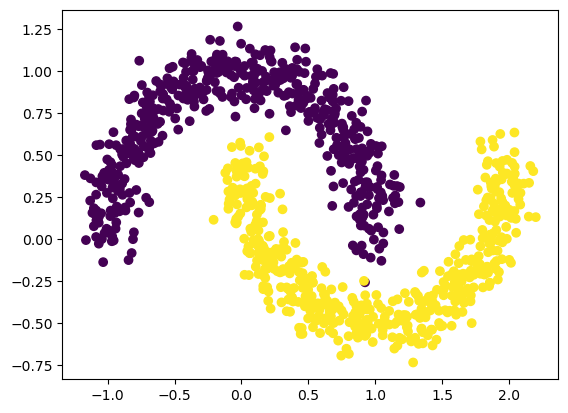

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

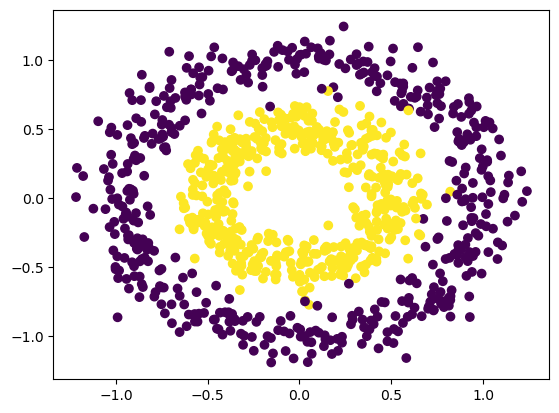

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)


# Fitting a Classification Model

In [12]:
from sklearn.linear_model import Perceptron

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

clf.score(X, y)


0.956

As we said earlier, do not worry too much about what is a perceptron. We are going to cover this later. But in a nutshell, a perceptron is a linear model for classification. It draws a line between two classes and then any data that reside below the line will be from the first class while the data points that reside above the line will be form the second class.


Let us visualise what just happened.


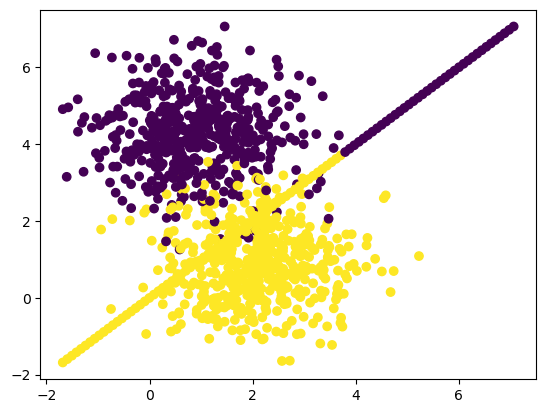

In [13]:
X0 = np.linspace(X.min(),  X.max(), num = 100)
X1 = np.linspace(X.min(),  X.max(), num = 100)

clas = clf.predict(np.c_[X0,X1])
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(X0,X1,c=clas)

In the next tutorial we will see how we can generate these ourselves from different statistical distributions

# Real Dataset for Regression

(20640, 8)


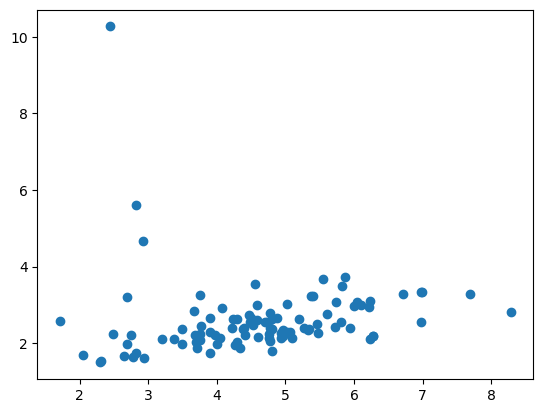

In [14]:
X , y = datasets.fetch_california_housing(return_X_y=True)
print(X.shape)
plt.scatter(X[:100,2],X[:100,5])

(20640, 8)


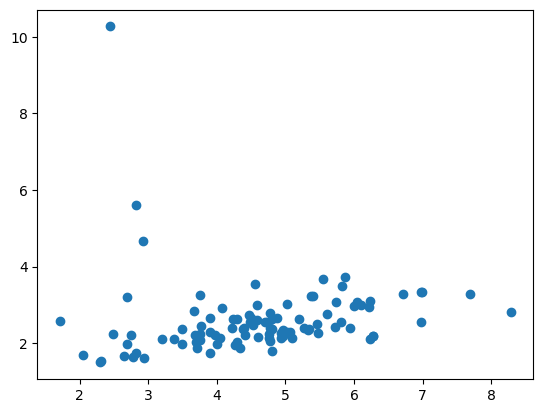

In [15]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()

X, y = fetch_california_housing(return_X_y=True)
print(X.shape)
plt.scatter(X[:100,2],X[:100,5])

# Synthetic Datasets for Regression

42.38550485581797 50


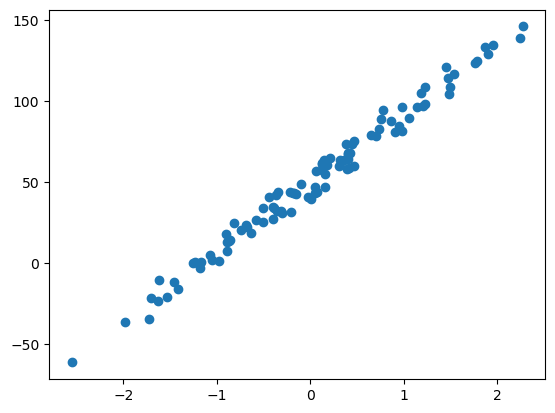

In [16]:
from sklearn import linear_model, datasets
bias = 50
X, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=5,
                                      coef=True, random_state=0, bias=bias)
plt.scatter(X,y)
print(coef, bias)

# Fitting a Regression Model 

Fitting a model in sklearn is really easy and a matter of selecting the type of the model and its hyper parameters and then calling the fit function which will execute a suitable learning algorithm. Below we show how to create a simple linear model that fits a simple linear dataset

In [17]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)

[42.50246757] 49.592909086484624


The above operation fitted a linear model using the synthetic data that was generated earlier. Note that the bias is almost the same as the intercept and the coef_ is almost the same as coef which means that our model fitted the generated data well. 

To visually see this we can ask our model to predict a set of new data and we plot both the old data and the new data line together.


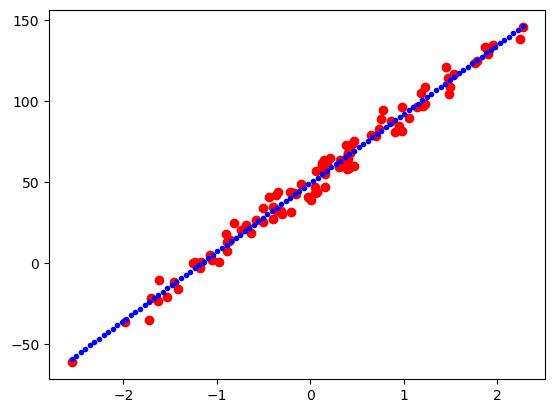

In [18]:
line_X = np.linspace(X.min(),  X.max(), num = 100).reshape(100,1) # np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
plt.plot(line_X, line_y, '.b', linewidth=2, label='Linear regressor')
plt.scatter(X,y,c='r')